In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [ ]:
#from sklearn  
from sklearn.datasets import load_boston 
boston = load_boston()
type(boston)

sklearn.utils.Bunch

In [ ]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
# changing the data to a panda's DataFrame 
import pandas as pd 
df = pd.DataFrame(boston['data'])
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
#adding column names to it 
df.columns = boston['feature_names']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
df['MEDV'] = boston['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
#to get null values and data type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


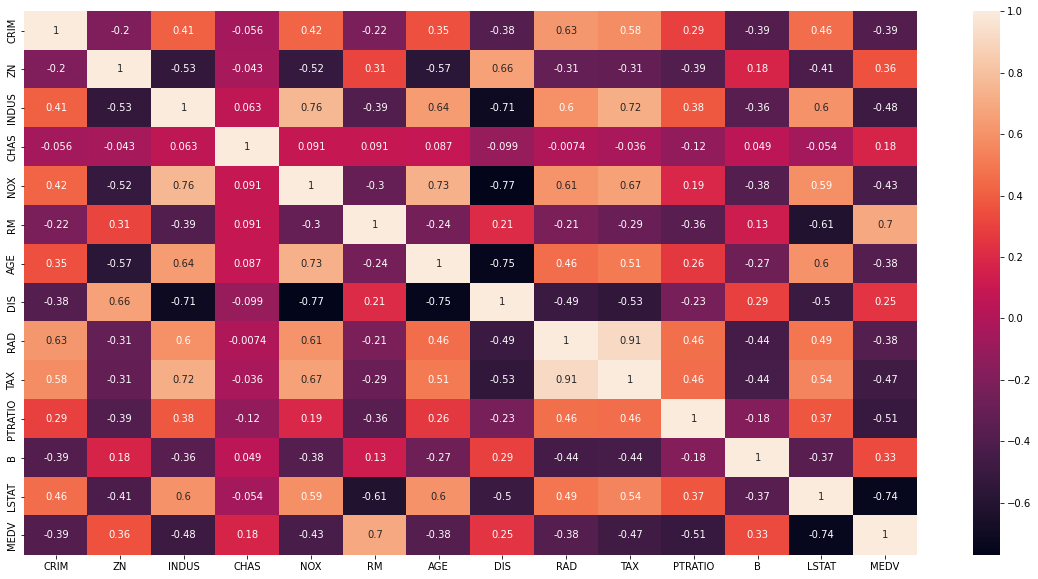

In [ ]:
# checking for correlations in the input data
plt.figure(figsize=(20,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix,annot=True)
#CHAS and DIS not effectively related as per the visual representation 

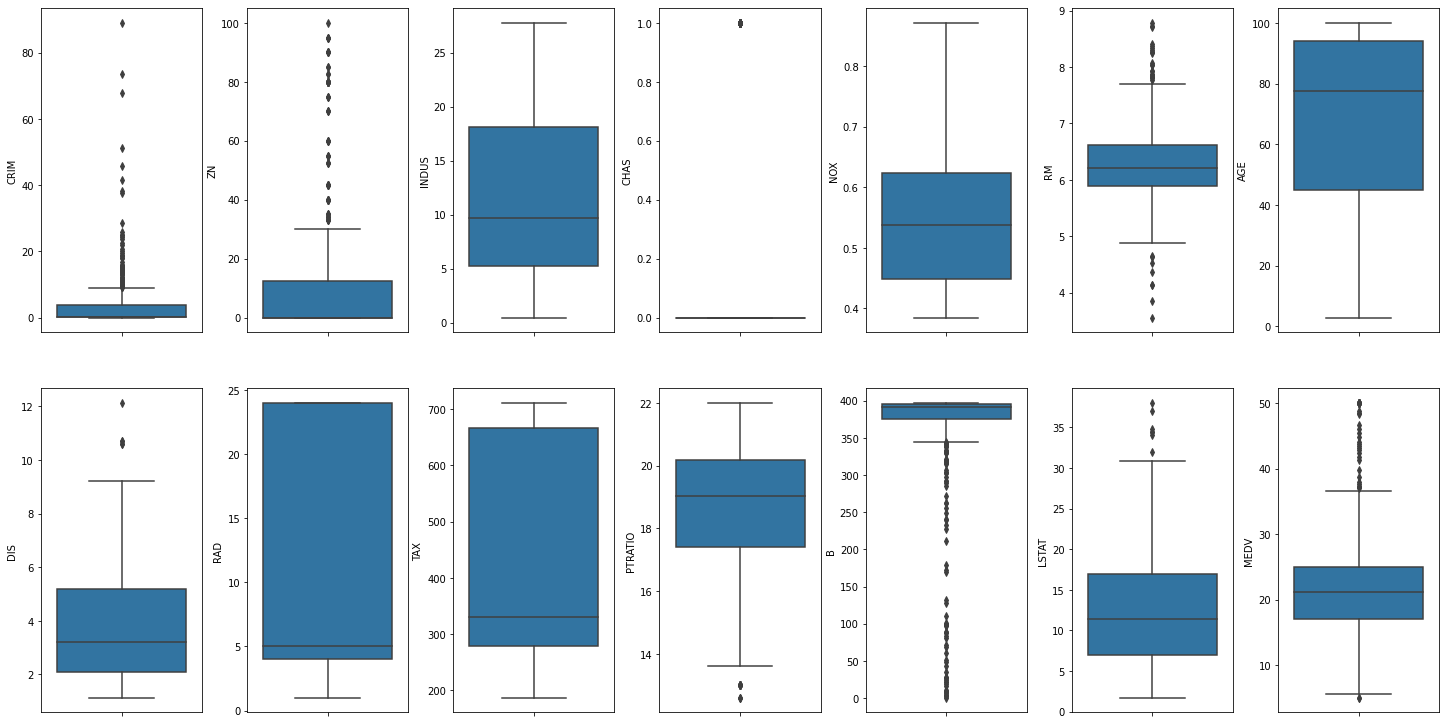

In [ ]:
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

From the figure above there is a heavy presence of outliers in columns like CRIM,ZN,RM,B AND LSAT . Lets look at the percentage of outliers also in the coming cell.

In [ ]:
#finding IQR 
for k,v in df.items():
  q1 = v.quantile(.25)
  q3 = v.quantile(0.75)
  iqr=q3-q1 # interquantile range 

  upper_limit = q3+ (1.5*iqr)
  lower_limit = q1- (1.5*iqr)

  outliers = v[(v<=lower_limit) | (v>=upper_limit)]
  percentage = (np.shape(outliers)[0]*100)/df.shape[0] 
  print(f'Outlier percentage of {k} is {percentage}%')

Outlier percentage of CRIM is 13.043478260869565%
Outlier percentage of ZN is 13.438735177865613%
Outlier percentage of INDUS is 0.0%
Outlier percentage of CHAS is 100.0%
Outlier percentage of NOX is 0.0%
Outlier percentage of RM is 5.928853754940712%
Outlier percentage of AGE is 0.0%
Outlier percentage of DIS is 0.9881422924901185%
Outlier percentage of RAD is 0.0%
Outlier percentage of TAX is 0.0%
Outlier percentage of PTRATIO is 2.964426877470356%
Outlier percentage of B is 15.217391304347826%
Outlier percentage of LSTAT is 1.383399209486166%
Outlier percentage of MEDV is 7.905138339920948%


**Outlier capping or trimming **

In [ ]:
#function to cap outliers
def cap(df,column_name):
  v=df[column_name]
  q1 = v.quantile(.25)
  q3 = v.quantile(0.75)
  iqr=q3-q1 # interquantile range 

  upper_limit = q3+ (1.5*iqr)
  lower_limit = q1- (1.5*iqr)

  df[column_name] =np.where(df[column_name]> upper_limit, upper_limit, np.where(df[column_name] < lower_limit,lower_limit,df[column_name]))
  return df[column_name]

In [ ]:
df['LSTAT']=cap(df,'LSTAT')
df['DIS']=cap(df,'DIS')

In [ ]:
# #function to trim outliers
# def trim(df,column_name):
#   v=df[column_name]
#   q1 = v.quantile(.25)
#   q3 = v.quantile(0.75)
#   iqr=q3-q1 # interquantile range 

#   upper_limit = q3+ (1.5*iqr)
#   lower_limit = q1- (1.5*iqr)
#   df= df[(df[column_name] < upper_limit) & (df[column_name] > lower_limit)]
#   print(df.shape)
#   return df


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

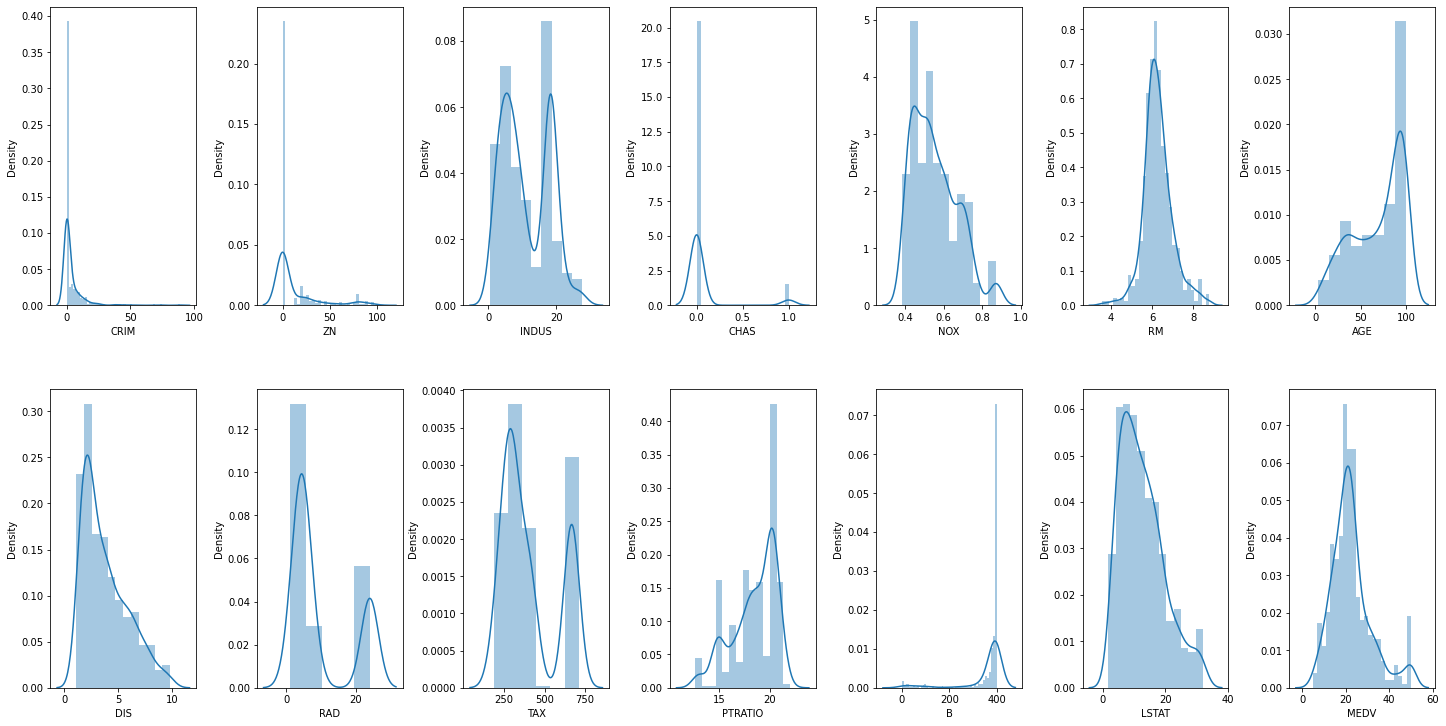

In [ ]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

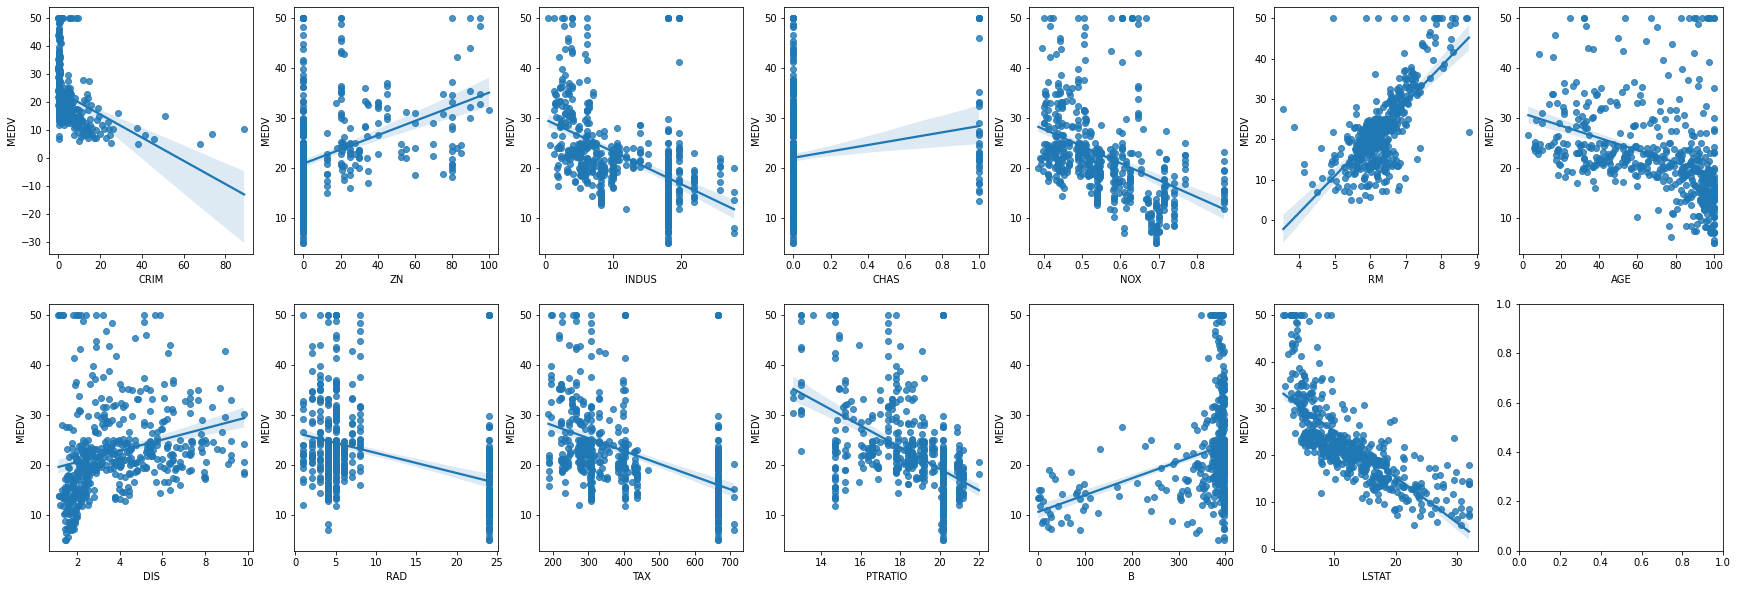

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_1= scaler.fit_transform(df.iloc[:,:-1])
df_1=pd.DataFrame(df_1,columns= boston['feature_names'])
df_1['MEDV'] = boston['target']

# df_1.head()
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(30, 10))
index = 0
axs = axs.flatten()
for i in range(len(df.columns[:-1])):
  a=sns.regplot(x = df[df.columns[i]],
            y = df_1['MEDV'], 
            data = df_1,ax=axs[i])

In [ ]:
df_1.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.040544,0.113636,0.391378,0.069170,0.349167,0.521869,0.676364,0.305406,0.371713,0.422208,0.622929,0.898568,0.359944,22.532806
std,0.096679,0.233225,0.251479,0.253994,0.238431,0.134627,0.289896,0.238145,0.378576,0.321636,0.230313,0.230205,0.232096,9.197104
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,0.000851,0.000000,0.173387,0.000000,0.131687,0.445392,0.433831,0.111673,0.130435,0.175573,0.510638,0.945730,0.172662,17.025000
50%,0.002812,0.000000,0.338343,0.000000,0.314815,0.507281,0.768280,0.239075,0.173913,0.272901,0.686170,0.986232,0.318531,21.200000
75%,0.041258,0.125000,0.646628,0.000000,0.491770,0.586798,0.938980,0.467004,1.000000,0.914122,0.808511,0.998298,0.503597,25.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50.000000


From visualisation and correlation results we can conclude some features are not linear ,so lets analyse each features seperately and implement transformation if possible , or drop if found not usefull for model building.

1st feature)CRIM (per capita crime rate by town) vs MEDV (Median value of owner-occupied homes in $1000's)

correlation :           CRIM      MEDV
CRIM  1.000000 -0.388305
MEDV -0.388305  1.000000


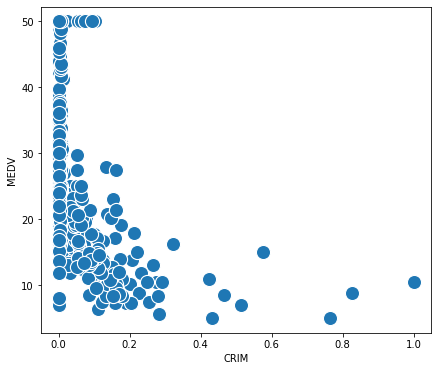

In [ ]:
plt.figure(figsize=(7,6))
sns.scatterplot(data=df_1, x=df_1['CRIM'], y=df_1['MEDV'],s=200, palette="deep")
# sns.regplot(data=df_1, x=df_1['CRIM'], y=df_1['MEDV'])
print('correlation :',df_1[['CRIM','MEDV']].corr())

# CRIM and ZN has a lot of outliers if model does not go very well we might have to drop these fetures 

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step
/usr/local/lib/python3.7/dist-packages/numpy/core/function_base.py:161: RuntimeWarning: invalid value encountered in add
  y += start
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1396: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)


correlation :           CRIM      MEDV
CRIM  1.000000 -0.456292
MEDV -0.456292  1.000000


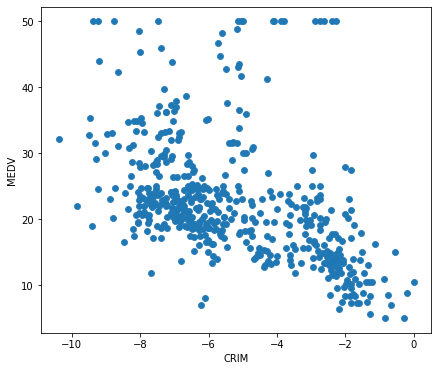

In [ ]:
#np.log() ,np.sqrt(),np.power(df,0.5),np.exp()
df_1['CRIM']=np.log(df_1['CRIM'])
plt.figure(figsize=(7,6))
sns.scatterplot(data=df_1, x=df_1['CRIM'], y=df_1['MEDV'], palette="deep")
sns.regplot(data=df_1, x=df_1['CRIM'], y=df_1['MEDV'])
print('correlation :',df_1[['CRIM','MEDV']].corr())
#though it shows a convincing corr value , considering the outlier and the importance of the feature through initial model building dropping the feature will be a good choice .

In [ ]:
df_1.drop('CRIM',axis=1,inplace=True)

2th feature)ZN       proportion of residential land zoned for lots over 25,000 sq.ft.   vs   MEDV (Median value of owner-occupied homes in $1000's)

correlation :             ZN      MEDV
ZN    1.000000  0.360445
MEDV  0.360445  1.000000


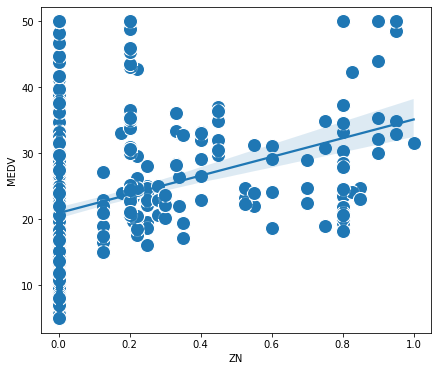

In [ ]:
plt.figure(figsize=(7,6))
sns.scatterplot(data=df_1, x=df_1['ZN'], y=df_1['MEDV'],s=200, palette="deep")
sns.regplot(data=df_1, x=df_1['ZN'], y=df_1['MEDV'])
print('correlation :',df_1[['ZN','MEDV']].corr())

correlation :            ZN     MEDV
ZN    1.00000  0.38297
MEDV  0.38297  1.00000


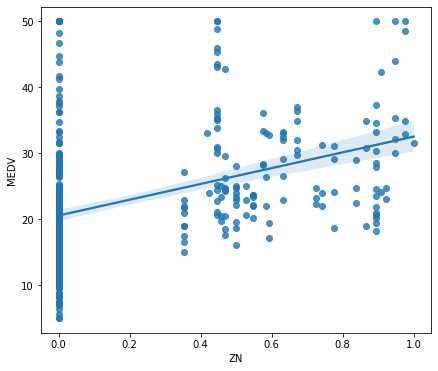

In [ ]:
#np.log() ,np.sqrt(),np.power(df,0.5),np.exp()
df_1['ZN']=np.sqrt(df_1['ZN'])
plt.figure(figsize=(7,6))
# sns.scatterplot(data=df_1, x=df_1['ZN'], y=df_1['MEDV'], palette="deep")
sns.regplot(data=df_1, x=df_1['ZN'], y=df_1['MEDV'])
print('correlation :',df_1[['ZN','MEDV']].corr())

3rd feature)INDUS (proportion of non-retail business acres per town) vs MEDV (Median value of owner-occupied homes in $1000's)

correlation :           INDUS      MEDV
INDUS  1.000000 -0.483725
MEDV  -0.483725  1.000000


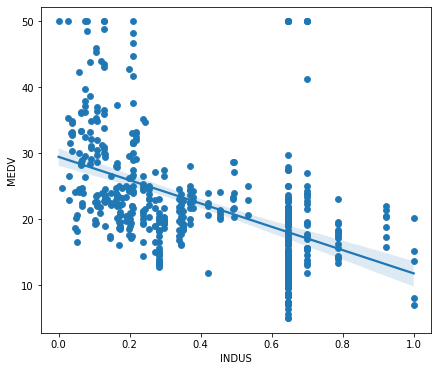

In [ ]:
plt.figure(figsize=(7,6))
sns.scatterplot(data=df_1, x=df_1['INDUS'], y=df_1['MEDV'], palette="deep")
sns.regplot(data=df_1, x=df_1['INDUS'], y=df_1['MEDV'])
print('correlation :',df_1[['INDUS','MEDV']].corr())
#Since the graph already shows fairly linear relation , we are not transforming it for now.

4th feature) CHAS (Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) vs MEDV (Median value of owner-occupied homes in $1000's)

In [ ]:
df['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [ ]:
#Since CHAS is a binary feature lets keep it for now .

5 th feature) NOX(nitric oxides concentration (parts per 10 million))vs MEDV (Median value of owner-occupied homes in $1000's)

correlation :            NOX      MEDV
NOX   1.000000 -0.427321
MEDV -0.427321  1.000000


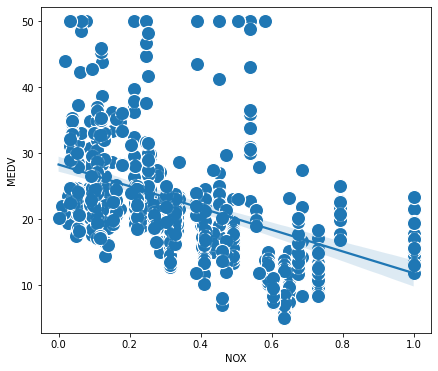

In [ ]:
plt.figure(figsize=(7,6))
sns.scatterplot(data=df_1, x=df_1['NOX'], y=df_1['MEDV'],s=200, palette="deep")
sns.regplot(data=df_1, x=df_1['NOX'], y=df_1['MEDV'])
print('correlation :',df_1[['NOX','MEDV']].corr())
#already fairly linear and the feature is acceptable as well .

6th feature) RM (average number of rooms per dwelling) Vs MEDV (Median value of owner-occupied homes in $1000's).

correlation :            RM     MEDV
RM    1.00000  0.69536
MEDV  0.69536  1.00000


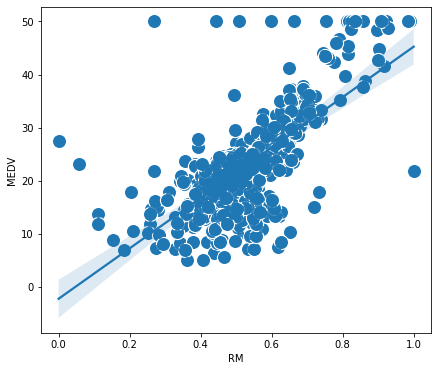

In [ ]:
plt.figure(figsize=(7,6))
sns.scatterplot(data=df_1, x=df_1['RM'], y=df_1['MEDV'],s=200, palette="deep")
sns.regplot(data=df_1, x=df_1['RM'], y=df_1['MEDV'])
print('correlation :',df_1[['RM','MEDV']].corr())
#already fairly linear and the feature is acceptable as well inspite of 5prcnt outlier .

7th feature)AGE (proportion of owner-occupied units built prior to 1940) Vs MEDV (Median value of owner-occupied homes in $1000's).

correlation :            AGE      MEDV
AGE   1.000000 -0.376955
MEDV -0.376955  1.000000


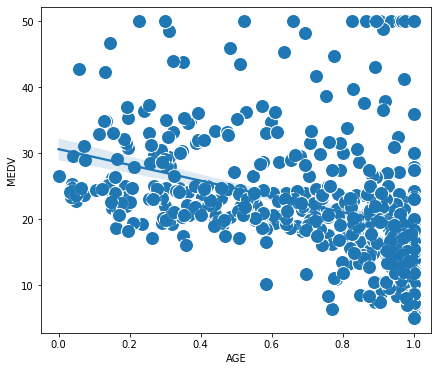

In [ ]:
plt.figure(figsize=(7,6))
sns.scatterplot(data=df_1, x=df_1['AGE'], y=df_1['MEDV'],s=200, palette="deep")
sns.regplot(data=df_1, x=df_1['AGE'], y=df_1['MEDV'])
print('correlation :',df_1[['AGE','MEDV']].corr())
#fairly linear and the feature is acceptable how ever erlier model predicted its relevence to be very low and dropping it is giving better results. .

In [ ]:
df_1.drop('AGE',axis=1,inplace=True)

8th feature)  DIS (weighted distances to five Boston employment centres) Vs MEDV (Median value of owner-occupied homes in $1000's).

correlation :            DIS      MEDV
DIS   1.000000  0.253172
MEDV  0.253172  1.000000


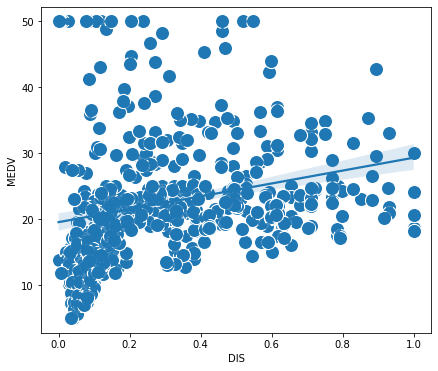

In [ ]:
plt.figure(figsize=(7,6))
sns.scatterplot(data=df_1, x=df_1['DIS'], y=df_1['MEDV'],s=200, palette="deep")
sns.regplot(data=df_1, x=df_1['DIS'], y=df_1['MEDV'])
print('correlation :',df_1[['DIS','MEDV']].corr())
#Acceptable corr val , feature signifance on models bfr have higher approval rate.

9th feature)RAD (index of accessibility to radial highways) Vs MEDV (Median value of owner-occupied homes in $1000's).

In [ ]:
#Rad could be considered as a classification feature 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


correlation :            RAD      MEDV
RAD   1.000000 -0.381626
MEDV -0.381626  1.000000


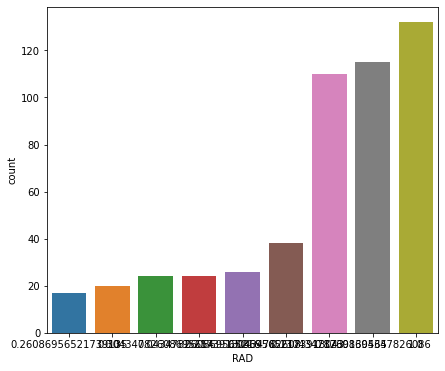

In [ ]:
plt.figure(figsize=(7,6))
sns.countplot(df_1['RAD'],order=df_1['RAD'].value_counts().index[::-1])

# sns.barplot(data=df_1, x=df_1['RAD'], y=df_1['MEDV'], palette="deep")
print('correlation :',df_1[['RAD','MEDV']].corr())
#Even though the visual representation is not very convincing the corr value as well as feature importance val from model unanimously upholds the relevance of the feature.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'RAD vs Mean_MEDV')

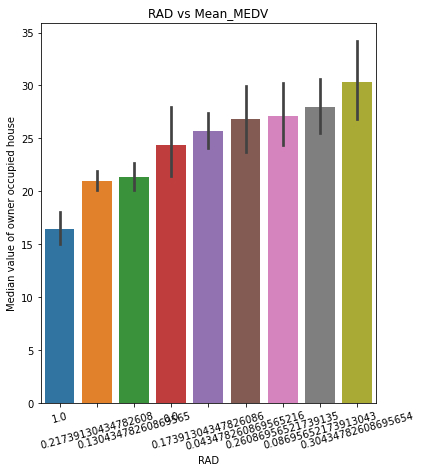

In [ ]:
# plotting barcjart btwn RAD and MEDV
plt.figure(figsize=(6,7))
RAD_order = df_1.groupby('RAD')['MEDV'].mean().reset_index().sort_values('MEDV')['RAD']

sns.barplot(df_1['RAD'],df_1['MEDV'],order=RAD_order)
plt.xticks(rotation=15)
plt.xlabel('RAD')
plt.ylabel('Median value of owner occupied house')
plt.title('RAD vs Mean_MEDV')

#it shows a light linear connection 

10 feature) TAX (full-value property-tax rate per $10,000)Vs MEDV (Median value of owner-occupied homes in $1000's).*italicized text*

correlation :            TAX      MEDV
TAX   1.000000 -0.468536
MEDV -0.468536  1.000000


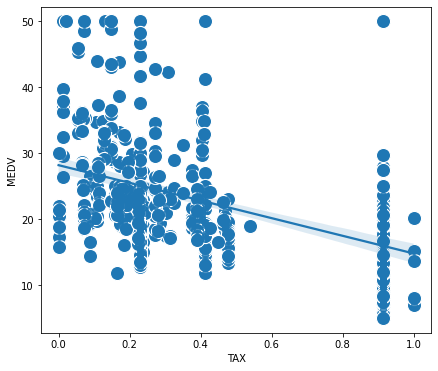

In [ ]:
plt.figure(figsize=(7,6))
sns.scatterplot(data=df_1, x=df_1['TAX'], y=df_1['MEDV'],s=200, palette="deep")
sns.regplot(data=df_1, x=df_1['TAX'], y=df_1['MEDV'])
print('correlation :',df_1[['TAX','MEDV']].corr())
#Better corr score hence let it stay putt

11th feature)PTRATIO (pupil-teacher ratio by town) Vs MEDV (Median value of owner-occupied homes in $1000's).

correlation :           PTRATIO      MEDV
PTRATIO  1.000000 -0.507787
MEDV    -0.507787  1.000000


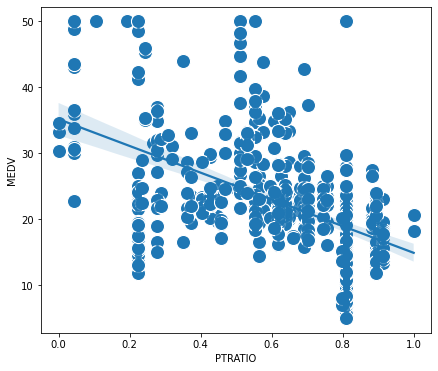

In [ ]:
plt.figure(figsize=(7,6))
sns.scatterplot(data=df_1, x=df_1['PTRATIO'], y=df_1['MEDV'],s=200, palette="deep")
sns.regplot(data=df_1, x=df_1['PTRATIO'], y=df_1['MEDV'])
print('correlation :',df_1[['PTRATIO','MEDV']].corr())

12th feature)B (1000(Bk - 0.63)^2 where Bk is the proportion of black people by town) Vs MEDV (Median value of owner-occupied homes in $1000's).

correlation :              B      MEDV
B     1.000000  0.333461
MEDV  0.333461  1.000000


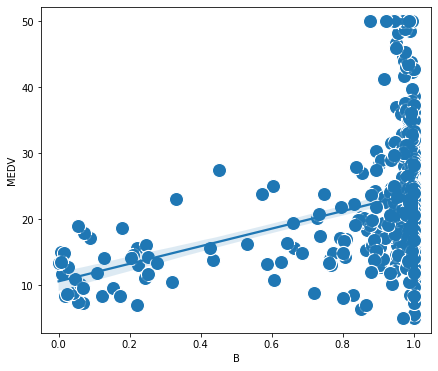

In [ ]:
plt.figure(figsize=(7,6))
sns.scatterplot(data=df_1, x=df_1['B'], y=df_1['MEDV'],s=200, palette="deep")
sns.regplot(data=df_1, x=df_1['B'], y=df_1['MEDV'])
print('correlation :',df_1[['B','MEDV']].corr())

13th feature)LSTAT (% lower status of the population)Vs MEDV (Median value of owner-occupied homes in $1000's).

correlation :           LSTAT      MEDV
LSTAT  1.000000 -0.744112
MEDV  -0.744112  1.000000


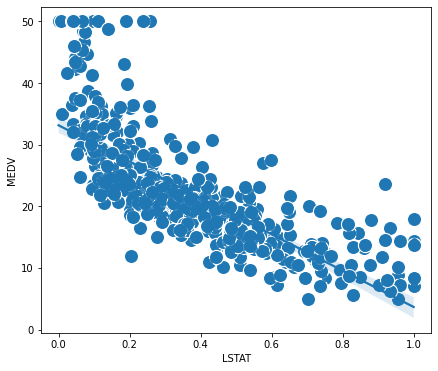

In [ ]:
plt.figure(figsize=(7,6))
sns.scatterplot(data=df_1, x=df_1['LSTAT'], y=df_1['MEDV'],s=200, palette="deep")
sns.regplot(data=df_1, x=df_1['LSTAT'], y=df_1['MEDV'])
print('correlation :',df_1[['LSTAT','MEDV']].corr())
#Beautifully correlated.

In [ ]:
df_1.info()
df_1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ZN       506 non-null    float64
 1   INDUS    506 non-null    float64
 2   CHAS     506 non-null    float64
 3   NOX      506 non-null    float64
 4   RM       506 non-null    float64
 5   DIS      506 non-null    float64
 6   RAD      506 non-null    float64
 7   TAX      506 non-null    float64
 8   PTRATIO  506 non-null    float64
 9   B        506 non-null    float64
 10  LSTAT    506 non-null    float64
 11  MEDV     506 non-null    float64
dtypes: float64(12)
memory usage: 47.6 KB


,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.165543,0.391378,0.069170,0.349167,0.521869,0.305406,0.371713,0.422208,0.622929,0.898568,0.359944,22.532806
std,0.293943,0.251479,0.253994,0.238431,0.134627,0.238145,0.378576,0.321636,0.230313,0.230205,0.232096,9.197104
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,0.000000,0.173387,0.000000,0.131687,0.445392,0.111673,0.130435,0.175573,0.510638,0.945730,0.172662,17.025000
50%,0.000000,0.338343,0.000000,0.314815,0.507281,0.239075,0.173913,0.272901,0.686170,0.986232,0.318531,21.200000
75%,0.353553,0.646628,0.000000,0.491770,0.586798,0.467004,1.000000,0.914122,0.808511,0.998298,0.503597,25.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50.000000


In [ ]:
X=df_1.iloc[:,:-1].values
y=df_1.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
# # scaling our data
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)

**EXECUTING SIMPLE LINEAR REGRESSION MODEL**

In [ ]:
from sklearn.linear_model import LinearRegression
model_1 = LinearRegression()
model_1.fit(X_train,y_train)

LinearRegression()

In [ ]:
model_1.coef_

array([  2.52790469,   0.53277236,   2.61156905,  -8.19938025,
        19.57718735, -12.13876294,   3.7870122 ,  -5.10826178,
        -9.67094552,   2.67304626, -17.04762883])

In [ ]:
df_imp = pd.DataFrame({'Features':df_1.columns[:-1],'Importance':abs(np.array(model_1.coef_))})
a=df_imp.sort_values(by="Importance",ascending=False)
a

,Features,Importance
4,RM,19.577187
10,LSTAT,17.047629
5,DIS,12.138763
8,PTRATIO,9.670946
3,NOX,8.199380
7,TAX,5.108262
6,RAD,3.787012
9,B,2.673046
2,CHAS,2.611569
0,ZN,2.527905


In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_linear_model=cross_val_score(model_1,X_train,y_train,cv=8).mean()
cross_val_linear_model

0.7172488054452238

In [ ]:
y_pred=model_1.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
R2_score = r2_score(y_test,y_pred)
print('R2 score here is',R2_score)

R2 score here is 0.6792190795674491


**NOW LETS TRY USING SGD REGRESSOR WITH  L1 PENALTY** 

In [ ]:
from sklearn.linear_model import SGDRegressor 
model_2 = SGDRegressor(penalty='l1',alpha=0.0001)
model_2.fit(X_train,y_train)

SGDRegressor(penalty='l1')

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_linear_model=cross_val_score(model_2,X_train,y_train,cv=15).mean()
print('Our cross validation score is :', cross_val_linear_model)

Our cross validation score is : 0.6966216812753302


In [ ]:
y_pred = model_2.predict(X_test)

In [ ]:
R2_score = r2_score(y_test,y_pred)
print('R2 score here is',R2_score)

R2 score here is 0.6680655097181725


**NOW LETS TRY USING SGD REGRESSOR WITH  L2 PENALTY** 

In [ ]:
from sklearn.linear_model import SGDRegressor 
model_3 = SGDRegressor(penalty='l2',alpha=0.0001)
model_3.fit(X_train,y_train)

SGDRegressor()

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_linear_model=cross_val_score(model_3,X_train,y_train,cv=15).mean()
print('Our cross validation score is :', cross_val_linear_model)

Our cross validation score is : 0.6972293686686247


In [ ]:
y_pred = model_3.predict(X_test)

In [ ]:
R2_score = r2_score(y_test,y_pred)
print('R2 score here is',R2_score)

R2 score here is 0.6680961548961024


In [ ]:
#normal linear regression without penalty gives a better score of 0.6792190795674491